#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


Let's take a look at a sample of the images in the dataset:

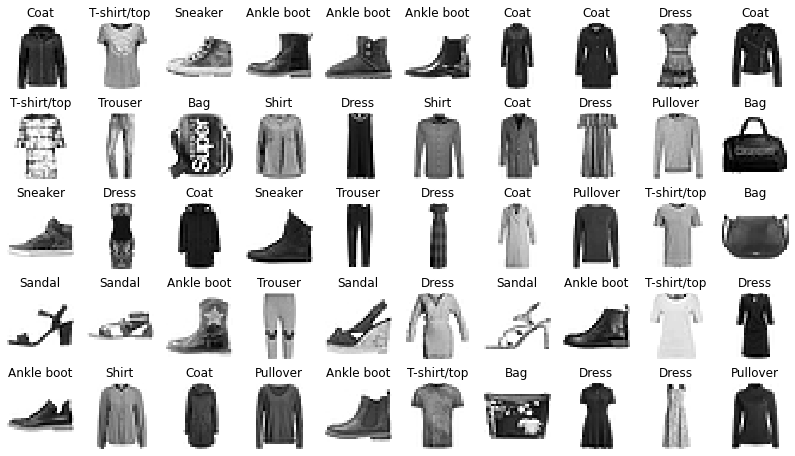

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mean = X_train.mean(axis=0)
stds = X_train.std(axis=0)

X_train = (X_train -  mean) / stds #[TO COMPLETE]
X_valid = (X_valid - mean) / stds #[TO COMPLETE]
X_test = (X_test - mean) / stds #[TO COMPLETE]


#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 24s 56ms/step - loss: 0.7290 - accuracy: 0.7608 - val_loss: 0.5193 - val_accuracy: 0.8244
Epoch 2/10
430/430 [==============================] - 24s 56ms/step - loss: 0.4766 - accuracy: 0.8363 - val_loss: 0.4436 - val_accuracy: 0.8530
Epoch 3/10
430/430 [==============================] - 24s 56ms/step - loss: 0.4273 - accuracy: 0.8538 - val_loss: 0.4092 - val_accuracy: 0.8660
Epoch 4/10
430/430 [==============================] - 24s 56ms/step - loss: 0.3980 - accuracy: 0.8620 - val_loss: 0.3945 - val_accuracy: 0.8696
Epoch 5/10
430/430 [==============================] - 24s 55ms/step - loss: 0.3789 - accuracy: 0.8674 - val_loss: 0.3759 - val_accuracy: 0.8720
Epoch 6/10
430/430 [==============================] - 24s 56ms/step - loss: 0.3634 - accuracy: 0.8727 - val_loss: 0.3729 - val_accuracy: 0.8746
Epoch 7/10
430/430 [==============================] - 24s 56ms/step - loss: 0.3519 - accuracy: 0.8788 - val_loss: 0.3552 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 0.3665 - accuracy: 0.8705
accuracy: 87.05%


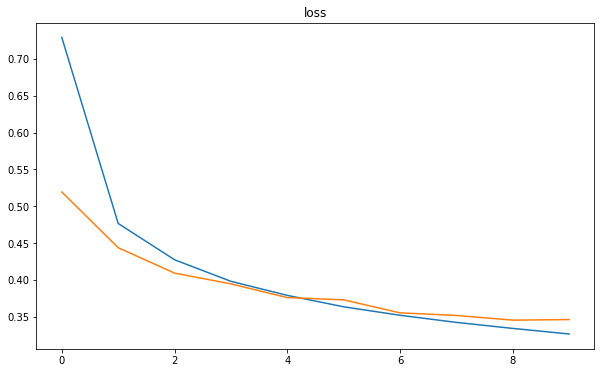

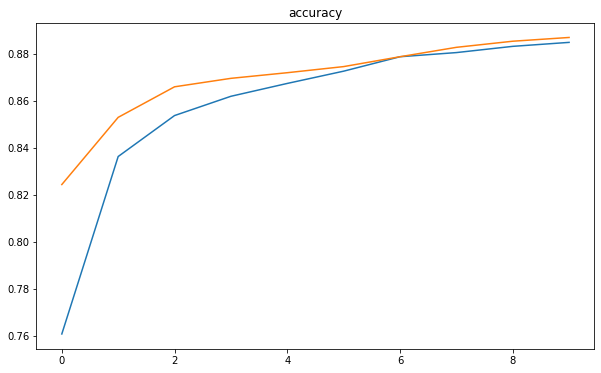

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

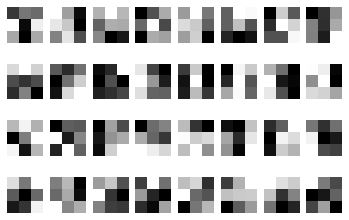

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
___________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] Answer to question 1:


The number of parameters are found by using a spesific formulation which can be described as:


(kernel_width * kernel_height*input_shape  +1) * number_of_filter 
 #the +1 is for bias


2.   [TO COMPLETE] Answer to question 2

The first convolutional layer the calculations are done as follows:
The kernel size is 3x3x1, the last parameter 1 comes from the input dimension of 28x28x1, therefore we get a dimension of 3x3x1 where the width and hight of the kernel is 3  and the number of filters used is 32:
therefore
(3x3x1 +1 ) * 32 = 320



For the second convolutional layer number of filters in the previous layer also takes part. Since there was no previous layers in the first convolutional layer this part was not taken into account. Therefore to find the answer for the second layer we need to calculate the equation:

((kernel_width * kernel_height * number of filters from previous layers)+1 ) * number of filters of the current layer

((2x2x32)+1)*16 = 2064 which makes the total no of parameters


Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 27s 62ms/step - loss: 1.0172 - accuracy: 0.6527 - val_loss: 0.7045 - val_accuracy: 0.7584
Epoch 2/10
430/430 [==============================] - 26s 61ms/step - loss: 0.6385 - accuracy: 0.7706 - val_loss: 0.5835 - val_accuracy: 0.7944
Epoch 3/10
430/430 [==============================] - 26s 61ms/step - loss: 0.5555 - accuracy: 0.7994 - val_loss: 0.5032 - val_accuracy: 0.8326
Epoch 4/10
430/430 [==============================] - 26s 61ms/step - loss: 0.5040 - accuracy: 0.8207 - val_loss: 0.4702 - val_accuracy: 0.8384
Epoch 5/10
430/430 [==============================] - 26s 62ms/step - loss: 0.4721 - accuracy: 0.8334 - val_loss: 0.4451 - val_accuracy: 0.8424
Epoch 6/10
430/430 [==============================] - 27s 62ms/step - loss: 0.4486 - accuracy: 0.8425 - val_loss: 0.4334 - val_accuracy: 0.8514
Epoch 7/10
430/430 [==============================] - 27s 62ms/step - loss: 0.4325 - accuracy: 0.8485 - val_loss: 0.4193 - val_accuracy:

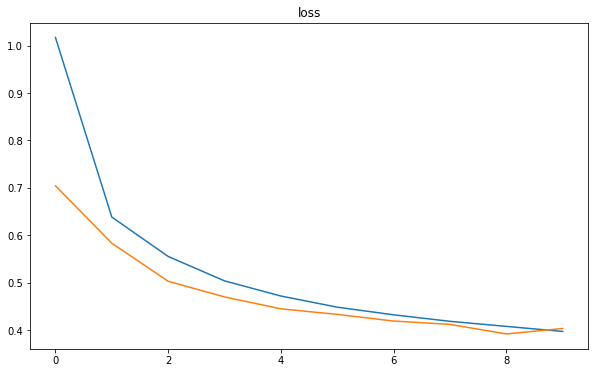

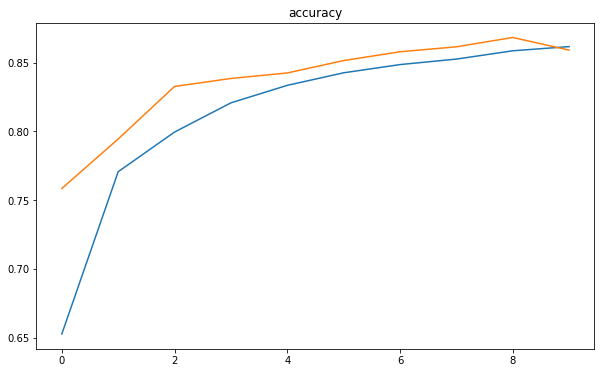

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Epoch 1/20
430/430 [==============================] - 64s 148ms/step - loss: 0.5405 - accuracy: 0.8089 - val_loss: 0.3658 - val_accuracy: 0.8778
Epoch 2/20
430/430 [==============================] - 63s 147ms/step - loss: 0.3611 - accuracy: 0.8731 - val_loss: 0.3157 - val_accuracy: 0.8894
Epoch 3/20
430/430 [==============================] - 63s 146ms/step - loss: 0.3212 - accuracy: 0.8853 - val_loss: 0.2865 - val_accuracy: 0.8980
Epoch 4/20
430/430 [==============================] - 63s 146ms/step - loss: 0.2950 - accuracy: 0.8943 - val_loss: 0.2770 - val_accuracy: 0.8998
Epoch 5/20
430/430 [==============================] - 63s 145ms/step - loss: 0.2759 - accuracy: 0.9006 - val_loss: 0.2591 - val_accuracy: 0.9120
Epoch 6/20
430/430 [==============================] - 64s 148ms/step - loss: 0.2641 - accuracy: 0.9060 - val_loss: 0.2534 - val_accuracy: 0.9122
Epoch 7/20
430/430 [==============================] - 64s 148ms/step - loss: 0.2508 - accuracy: 0.9104 - val_loss: 0.2315 - val_ac

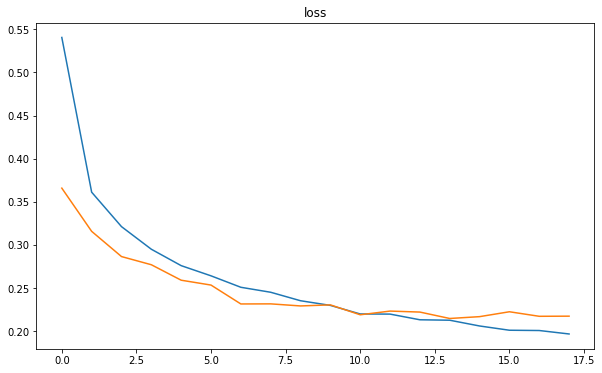

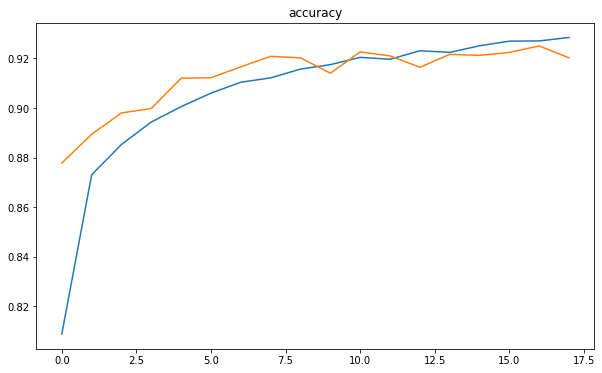

In [ ]:
import os
import time
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

logdir = os.path.join(os.curdir, "my_logs", "run_{}".format(time.time()))

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=4),
    keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True),
]


best_history = model.fit(X_train, y_train, epochs=20, batch_size=128,
                    validation_data=(X_valid, y_valid),callbacks=callbacks)

model.summary()
 
print("Best model")
scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

plot_loss(best_history)
plot_accuracy(best_history)

### [TO COMPLETE] Example of tests discussion
The best model that I found is as you can see above.
My model consists of:
1. 2 convolutional layers with activation function relu
2. 32 filters for the first convolutional layer and 64 filter for the second conv. layer is used
3. 3x3 kernel is used for both convolution layers
4. Max pooling applied after both layers with size 2x2
5. Dropout was applied after both maxpooling with a rate of 0.25
6. A Flatten layer is used
7. Fully connected Dense layer with 10 outputs and softmax function is used
8. Batch size is 128
9. Epochs is 20, early stopping is used
10. Adam optimizer is used
 

The achieved accuracy in the test set is  91.45% and the loss obtained is 0.2402


Discussion:
I have tried different models by changing the different parametrs as can be seen above. 

**1st model:** Some adjustments done on the best model,
2 convolutional layers with relu activation function,both layers  filter sizes are:32 with 3x3 kernel size, one max pooling  after the first layer with size 2x2, after the last convolutional layer one dropout was applied with rate 0.25  The others remained the same as the best model such as batch size 128, flatten and dense layers, epochs:20 and adam optimizer the obtained accuracy is: 90.48%

(This model is really similar to the best model with some differences, putting dropout and maxpooling after all convolutional layers in my opinion increased the accuracy in the best model.)

**2nd model**  The same model as the first model, but this time the batch size is changed into 256 the accuracy obtained is: %89.98


**3rd model:** the same model as 1st model but this time the filter numbers has been changed into 16 from 32, the accuracy is 90.27 %


**4th model:** 3 convolutional layers, kernel size=3, filter sizes=64, relu activation function used in each layer, max pooling applied after the first layer, with size 2x2, and dropout with rate 0.5 is applied after the third layer, no change on flatten and dense layers, optimizer: adam and batch size :128 epochs:20, accuracy is: 89.87%

**5th model:** the same model used in the 4th model but this time as optimizer SGD and tanh activation function in each layer is used. The accuracy obtained is: 85.88%

**6th model:** The 4th model is used but this time epochs has been changed into 50, the accuracy obtained is 90.25%


**Comments:**  

Changing and increasing the **batch size** into 256(decreasing) in the second model, the accuracy decreased a little bit, having a large batch size could lead to poor generalization.

Changing the **filters** from 32 to 16 in the third model has a decreasing affect on accuracy, but it is a really small change, but still having 32 filters are better than having 16 filters. 


Having 2 layers are better than having three layers when comparing the first and the fourth models. Maybe with 3 layers, a deeper network, had a poor generalization of the data and the 3 layer network was complex. But it is not a certain thing since the the models are not completely same.

Changing the **optimizer** to SGD and using a different **activation** function such as tanh in the fifth model, did not improve the model, therefore the best optimizer could be adam, and the activation function should remain as relu, because it handles the vanishing gradients and it is non saturating therefore it is faster, and using SGD and tanh decreased the accuracy. And compared to other optimizers, adam outperformes them, and can achieve good results faster.


Increasing the number of **epochs** in the sixth model helped in order to obtain slightly better accuracy. Which means that the network captured the underlying trend of the data better than lower no of epochs model.

As a result, I have used models with changing different parameters. The parameters which I focused on is batch size, filter number, number of layers, optimizer and activation function and number of epochs. The one hyperparameter which affected the network most was the change in optimizer and the activation function. The changes can be found above. And I have explained them with the possible reasons. 





